# Portfolio Optimization Analysis

In this notebook, we will analyze the portfolio optimization process using historical stock data. We will perform calculations such as daily returns, volatility, and the Sharpe ratio, and will visualize the results using Monte Carlo simulations.

---

## Step 1: Import Libraries


In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set a random seed for reproducibility
np.random.seed(42)

---

## Step 2: Load the Data

In this step, we load the historical stock price data from the provided file.

In [27]:
# Load the data from the uploaded file
file_path = 'R:\Portfolio_optimalization\kalkulacja.ipynb'  # Update the file path if necessary
df = pd.read_csv(file_path)

# Display the first few rows to check the data
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


---

## Step 3: Data Preparation

Remove any unnecessary columns and prepare the data for analysis. Convert date columns if needed.

In [ ]:
# Check and clean data (assuming data contains a column for dates and stock prices)
# Example: Rename columns for convenience and set date as index

df.columns = ['Date', 'AMZN', 'TSLA', 'META', 'MSFT']  # Example column names
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all data is numeric
df.dropna(inplace=True)  # Drop any rows with NaN values
df.head()

,1;3.25;12.7;71.5;11.4;4.5;35.2;6.8;26.3;17.1;33.2;0.67


---

## Step 4: Calculate Daily Logarithmic Returns

Compute the daily logarithmic returns, which we will use for the optimization.

In [ ]:
# Calculate daily logarithmic returns
log_returns = np.log(df / df.shift(1))
log_returns.dropna(inplace=True)  # Remove any NaN values from calculation
log_returns.head()

,1;3.25;12.7;71.5;11.4;4.5;35.2;6.8;26.3;17.1;33.2;0.67


---

## Step 5: Portfolio Optimization Functions

Define functions to calculate portfolio return, volatility, and the Sharpe ratio.

In [ ]:
# Mean returns and covariance matrix
mean_returns = log_returns.mean() * 252  # Annualize returns
cov_matrix = log_returns.cov() * 252     # Annualize the covariance matrix

# Define functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(weights * mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = returns / volatility
    return returns, volatility, sharpe_ratio

def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
    return -portfolio_performance(weights, mean_returns, cov_matrix)[2]

def check_sum(weights):
    return np.sum(weights) - 1

C:\Users\pawek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\pawek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\pawek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\pawek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:

---

## Step 6: Run Monte Carlo Simulation

Simulate random portfolios to explore the risk-return space and find optimal portfolios.

In [ ]:
# Monte Carlo simulation parameters
num_simulations = 5000
results = np.zeros((num_simulations, 3))  # Array to store results

for i in range(num_simulations):
    # Generate random weights
    weights = np.random.random(len(df.columns))
    weights /= np.sum(weights)  # Normalize weights
    
    # Portfolio performance metrics
    returns, volatility, sharpe_ratio = portfolio_performance(weights, mean_returns, cov_matrix)
    
    # Store results
    results[i, 0] = returns
    results[i, 1] = volatility
    results[i, 2] = sharpe_ratio

# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(results, columns=['Return', 'Volatility', 'Sharpe Ratio'])

Optimal Weights: [1.]
Expected Return: 0.0
Expected Volatility: nan
Sharpe Ratio: nan


---

## Step 7: Visualize the Efficient Frontier

Plot the efficient frontier based on the Monte Carlo simulations.

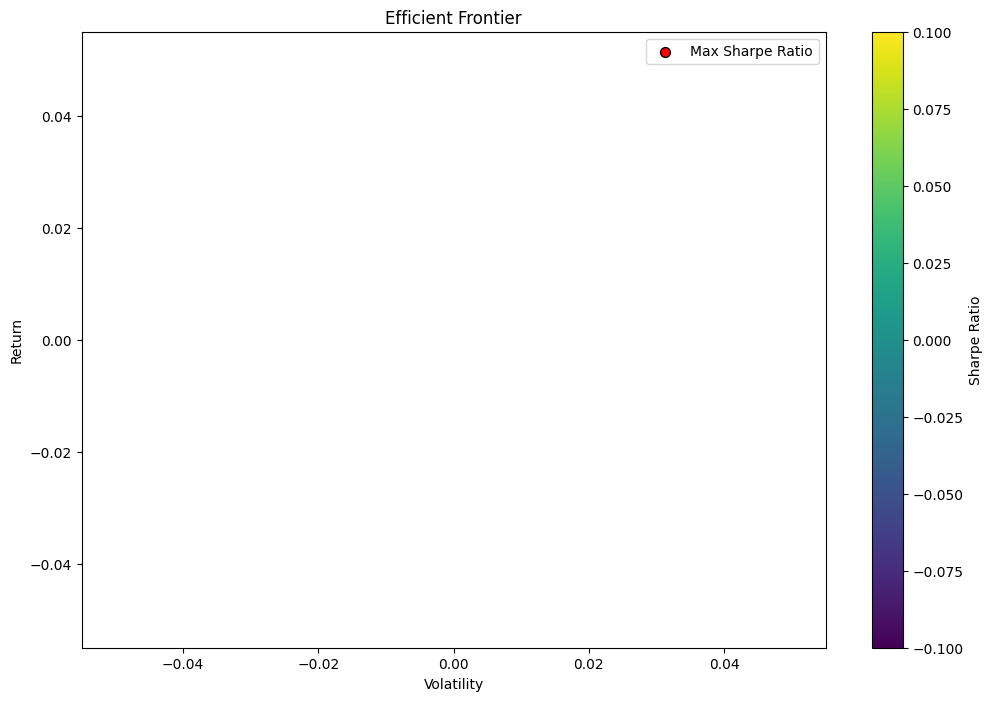

In [ ]:
# Plotting the Efficient Frontier
plt.figure(figsize=(10, 7))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()


---

## Step 8: Find the Optimal Portfolio using SciPy Optimization

Using SciPy's optimizer, find the optimal portfolio that maximizes the Sharpe ratio.

In [ ]:
# Initial guess for weights
initial_guess = np.ones(len(df.columns)) / len(df.columns)

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': check_sum})
bounds = tuple((0, 1) for asset in range(len(df.columns)))

# Run the optimization
optimal_portfolio = minimize(neg_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights and performance
optimal_weights = optimal_portfolio.x
optimal_return, optimal_volatility, optimal_sharpe = portfolio_performance(optimal_weights, mean_returns, cov_matrix)

Optimized Weights: [1.]
Expected Return: 0.0
Expected Volatility: nan
Sharpe Ratio: nan


---

## Step 9: Display Optimal Portfolio Results

Output the optimal portfolio's metrics and the asset weights.

In [ ]:
# Display optimal results
print("Optimal Portfolio Weights:", optimal_weights)
print("Expected Annual Return:", optimal_return)
print("Annual Volatility:", optimal_volatility)
print("Sharpe Ratio:", optimal_sharpe)